In [37]:
# Obtener archivo csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

file_path = Path('C:/Users/yamak/Desktop/Portafolio/Proyecto 01/Finanzas personales/CSV/todas_las_tablas_limpias_v2.csv')

df = pd.read_csv(file_path)
df["Cargos"] = df["Cargos"].fillna(0)
df["Abonos"] = df["Abonos"].fillna(0)
df["Saldo"] = df["Saldo"].fillna(0)
print(df.tail())

      ID Fecha transaccion Fecha reflejado                       Descripcion  \
673  895        28-08-2025      28-08-2025        CARGO POR IMPUESTO 4X1.000   
674  896        28-08-2025      28-08-2025   COMPRA POS ASC DLO*DiDi Food CO   
675  897        28-08-2025      28-08-2025        CARGO POR IMPUESTO 4X1.000   
676  898        28-08-2025      28-08-2025  COMPRA POS ASC TDA D CAFE JUAN V   
677  899        29-08-2025      31-08-2025     ABONO POR INTERESES DE CUENTA   

      Cargos  Abonos      Saldo     source_pdf Descripcion detalle  \
673    106.0     0.0  8496726.2  08-Agosto.pdf            Impuesto   
674  26448.0     0.0  8470278.2  08-Agosto.pdf                Didi   
675    135.0     0.0  8470143.2  08-Agosto.pdf            Impuesto   
676  33800.0     0.0  8436343.2  08-Agosto.pdf         Juan Valdez   
677      0.0    66.0  8436409.2  08-Agosto.pdf                Otro   

    Categoria movimiento  
673             Impuesto  
674         Aplicaciones  
675             I

In [ ]:
""" 
Revision inicial de los datos

df.info() → Tipos de datos y valores nulos. ✅
df.describe() → Estadísticas básicas (promedios, máximos, mínimos, etc.). ✅
df.isna().sum() → Revisión de nulos o inconsistencias. ✅

"""

In [ ]:
#Tipos de datos y valores nulos.
df.info()

In [ ]:
#Hay un dato perdido en la columna fecha reflejado en el df.info() anterior.
#Se procede a rellenar con la fecha de la columna fecja transaccion.
df['Fecha reflejado'] = df['Fecha reflejado'].fillna(df['Fecha transaccion'])

In [ ]:
# Estadísticas básicas
df.describe()

In [ ]:
# Revisión de nulos o inconsistencias.
df.isna().sum()

In [ ]:
""" 
Distribuciones clave

Histograma de montos (sns.histplot(df["valor"]))
Conteo por categoría o tipo de transacción (alimentación, transporte, ingreso, etc.)
Gráficos de gastos vs ingresos mensuales
Top 10 categorías donde más gastas

"""

In [ ]:
# Histograma de Saldo
sns.histplot(df["Saldo"], bins=30, kde=True)
plt.title("Distribución de Saldo (gastos e ingresos)")
plt.xlabel("Saldo")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
sns.lineplot(x="Fecha transaccion", y="Saldo", data=df)
plt.title("Evolución del saldo en el tiempo")

In [ ]:
sns.histplot(df["Cargos"], bins=30, kde=True)
plt.title("Distribución de Cargo (gastos)")
plt.xlabel("Cargo")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
sns.lineplot(x="Fecha transaccion", y="Cargos", data=df)
plt.title("Evolución del Cargos en el tiempo")

In [ ]:
sns.histplot(df["Abonos"], bins=30, kde=True)
plt.title("Distribución de Abonos (ingresos)")
plt.xlabel("Abonos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
sns.lineplot(x="Fecha transaccion", y="Abonos", data=df)
plt.title("Evolución del Abonos en el tiempo")

In [ ]:
df["Fecha transaccion"] = pd.to_datetime(df["Fecha transaccion"],  format="%d-%m-%Y" ,errors="coerce")
#df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean().plot(kind="bar")
#print( df["Fecha transaccion"].dt.to_period("M").unique())
mensual = df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean()
mensual[mensual.notna()].plot(kind="bar")
plt.title("Saldo promedio mensual (2025)")
plt.ylabel("Saldo promedio")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

"""
Análisis temporal

Si tienes una columna de fecha:

Agrupa por mes: ✅
Visualiza tendencias (líneas de tiempo, estacionalidad, etc.) ✅
Calcula tasas de ahorro o gasto promedio por mes.

"""



In [ ]:
# Lineas de tiempo de cargo mensual
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Cargos"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

In [ ]:
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

In [ ]:
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Abonos"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

In [ ]:
# Estacionalidad mis datos 

df["mes"] = df["Fecha transaccion"].dt.to_period("M")
gastos_mes = df.groupby("mes")["Cargos"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(gastos_mes["mes"].astype(str), gastos_mes["Cargos"])
plt.title("Gastos mensuales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# si tu índice es una fecha
gastos_mes.index = pd.PeriodIndex(gastos_mes["mes"], freq="M")
result = seasonal_decompose(gastos_mes["Cargos"], model="additive", period=12)
result.plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gastos_mes["Cargos"])
plt.show()

In [ ]:
"""
Detección de anomalías

Transacciones atípicas o picos inusuales (z-score o IQR)
Días con gasto fuera de patrón
"""

In [ ]:
#z-score
import numpy as np

# Calcular z-score
df["zscore_cargos"] = (df["Cargos"] - df["Cargos"].mean()) / df["Cargos"].std()

# Filtrar transacciones con z-score alto (picos)
outliers_z = df[np.abs(df["zscore_cargos"]) > 3]

print(outliers_z[["Fecha transaccion", "Descripcion", "Cargos", "zscore_cargos"]])

    Fecha transaccion                                        Descripcion  \
76         06-02-2025                   COMPRA POS ASC CENTRO COLOMBO AM   
134        06-03-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
204        03-04-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
230        13-04-2025                   COMPRA POS ASC OPTICAS GMO COLOM   
278        04-05-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
284        05-05-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
351        30-05-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
366        03-06-2025  ENVIO POR TRANSFIYA APP BBVA ENLACE DE APLICATIVO   
458        01-07-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
484        07-07-2025  Transferiste desde BBVA MOVIL a Emilio Zea ENL...   
561        29-07-2025   PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
581        01-08-2025                          Transferiste a Emilio Zea   
593        0

In [ ]:
#quantile IQR
Q1 = df["Cargos"].quantile(0.25)
Q3 = df["Cargos"].quantile(0.75)
IQR = Q3 - Q1

# Rango permitido
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Detectar outliers
outliers_iqr = df[(df["Cargos"] < lower) | (df["Cargos"] > upper)]

print(outliers_iqr[["Fecha transaccion", "Descripcion", "Cargos"]])

    Fecha transaccion                                       Descripcion  \
1          02-01-2025                            CAR DOMI TRA1030673038   
18         10-01-2025                              COMPRA POS ASC NOTAR   
26         14-01-2025                RETIRO CAJERO BBVA BARRIO RESTREPO   
40         18-01-2025                  COMPRA POS RED CALENTAO DE LA OC   
46         21-01-2025                  COMPRA POS ASC HAMBURGUESAS EL C   
..                ...                                               ...   
593        06-08-2025                  COMPRA POS RED DANIEL MAURICIO C   
613        10-08-2025  PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
629        16-08-2025                      COMPRA POS RED ARBOL DE VIDA   
649        20-08-2025  PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   
671        25-08-2025  PAGO PSE COMERCIO O FACTURA ENLACE DE APLICATIVO   

       Cargos  
1    150000.0  
18   101860.0  
26   100000.0  
40   235800.0  
46    83800.0  
.. 

In [42]:
gastos_diarios = df.groupby("Fecha transaccion")["Cargos"].sum().reset_index()
Q1 = gastos_diarios["Cargos"].quantile(0.25)
Q3 = gastos_diarios["Cargos"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filtrar días con gasto fuera del rango
dias_fuera_patron = gastos_diarios[
    (gastos_diarios["Cargos"] < lower) | (gastos_diarios["Cargos"] > upper)
]

print(dias_fuera_patron)

    Fecha transaccion     Cargos
4          01-07-2025   760229.0
5          01-08-2025   821372.0
16         03-04-2025   713342.0
17         03-06-2025   812136.0
19         04-02-2025   502000.0
22         04-05-2025  2055509.0
27         05-05-2025   666706.0
31         06-02-2025   972876.0
32         06-03-2025   701796.0
36         06-08-2025   790404.0
42         07-07-2025   912937.0
60         10-08-2025   522160.0
63         11-03-2025   588803.0
76         13-04-2025  4226759.0
95         16-03-2025   473379.0
149        25-08-2025   840873.0
151        26-02-2025   507020.0
169        29-03-2025   524520.0
172        29-07-2025   780811.0
176        30-05-2025  1117191.0


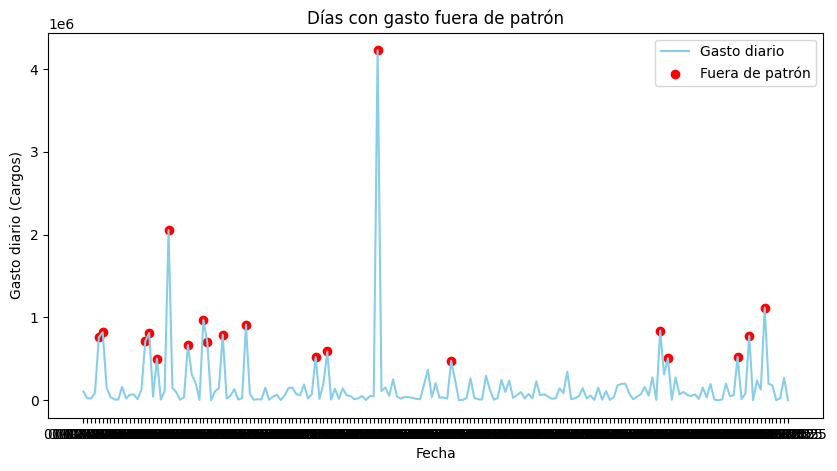

In [43]:
plt.figure(figsize=(10,5))
plt.plot(gastos_diarios["Fecha transaccion"], gastos_diarios["Cargos"], label="Gasto diario", color="skyblue")
plt.scatter(dias_fuera_patron["Fecha transaccion"], dias_fuera_patron["Cargos"], color="red", label="Fuera de patrón")
plt.title("Días con gasto fuera de patrón")
plt.xlabel("Fecha")
plt.ylabel("Gasto diario (Cargos)")
plt.legend()
plt.show()